# **İmage Recognition using Pytorch with Fashion MNIST DataSet** 

The Fashion MNIST Datasets contain a set of  28x28 grayscale images of clotes. Our goal is building a neural network using Pytorch and then training the network to predict clothes.
*italicized text*

In [11]:
#importing required libraries..
import torch
import numpy as np
import torch.nn as nn #All NN are mentioned here.
import torch.optim as optim 
import torch.nn.functional as F #This is for your activation functions.
from torchvision import datasets, transforms #Put data into tensors.
from torch.utils.data.sampler import  SubsetRandomSampler  #Use to subsample the dataset.

# **Load and Visualize the Data**

In [16]:
#Define a transform to convert to images to tensor and normalize.
#Creates a series of transformations to prepare the dataset.
#Converts tensor into channel (C) x height (H) X width (W)
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,),)]) #mean and std have to be sequences (e.g., tuples), 
                                                                      # therefore we should add a comma after the values

In [17]:
#Load the data: train and test sets
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=False, transform=transform)

In [19]:
#Preparing for validaion test
indices = list(range(len(trainset)))
np.random.shuffle(indices)
#to get 20% of the train set
split = int(np.floor(0.2 * len(trainset)))
train_sample = SubsetRandomSampler(indices[:split])
valid_sample = SubsetRandomSampler(indices[split:])

#Data Loader - this combines the dataset and a sampler, and provides an iterable over the given dataset.
trainloader = torch.utils.data.DataLoader(trainset, sampler=train_sample, batch_size=64)
validloader = torch.utils.data.DataLoader(trainset, sampler=valid_sample, batch_size=64)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)



In [20]:
trainset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /root/.pytorch/F_MNIST_data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

# **Visualize a Batch of Training Data**

In [21]:
trainloader

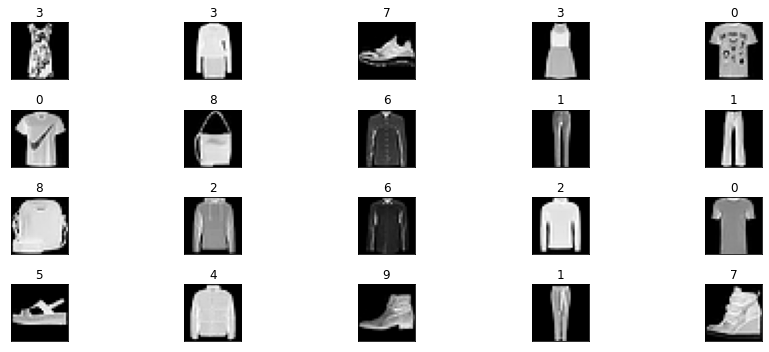

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
# get some random training images
dataiter = iter(trainloader)
print(dataiter)
images, labels = dataiter.next()


fig = plt.figure(figsize=(15,5))
for idx in np.arange(20):
  # xticks=[], yticks=[] is empty to print the images without any ticks around them
  #np.sqeeze : Remove single-dimensional entries from the shape of an array.
  ax = fig.add_subplot(4, 20/4, idx+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(images[idx]), cmap='gray')
   # .item() gets the value contained in a Tensor
  ax.set_title(labels[idx].item())
  fig.tight_layout()

# **Building the Network**

In [23]:
#Inherit ANN model
#Creating layers here.
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 120) #(input, output) #1st layer- nn.linear - linear layer - normal NN layer
    self.fc2 = nn.Linear(120, 120) #Hidden
    self.fc3 = nn.Linear(120,10) #Output
    #self.fc4 = nn.Linear(64,10)
    #defining the 20% dropout
    self.dropout = nn.Dropout(0.2)

  def forward(self,x): 
    #In Forward Model, we take tensor input x to change its shapes to our batch size using x.shape[0] , the -1 fill out the second dimension
    x = x.view(x.shape[0],-1)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    #x = self.dropout(F.relu(self.fc3(x)))
    #not using dropout on output layer
    x = F.log_softmax(self.fc3(x), dim=1)
    return x   


In [9]:
model = Classifier()
#defining the loss function
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

valid_loss_min = np.Inf #using this high value to make sure the update the weight first time
epochs = 40
steps = 0
model.train() #prep model for training
train_losses, valid_losses = [],[]
for e in range(epochs):
  running_loss =0 
  valid_loss = 0
   # train the model #
  for images, labels in trainloader:

     optimizer.zero_grad() 
     log_ps = model(images) #Make a forward pass through the network 
     loss = criterion(log_ps, labels)
     loss.backward() #Adjust weight - backward pass - calculate gradient per model parameter
     optimizer.step() #Upgrade model parameter
     running_loss += loss.item()*images.size(0) #Calculate the loss
  
  for images, labels in validloader:
     log_ps = model(images)
     loss = criterion(log_ps, labels)
     valid_loss += loss.item()*images.size(0)

  running_loss = running_loss/len(trainloader.sampler)
  valid_loss =  valid_loss/len(validloader.sampler)
  train_losses.append(running_loss)
  valid_losses.append(valid_loss)

  print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        e+1,
        running_loss,
        valid_loss
    ))
  if valid_loss <= valid_loss_min:
      print('validation loss decreased({:.6f} -->{:.6f}). Saving Model ...'.format(valid_loss_min, valid_loss))
      torch.save(model.state_dict(), 'model.pt')
      valid_loss_min = valid_loss

  




Epoch: 1 	Training Loss: 2.019007 	Validation Loss: 1.538811
validation loss decreased(inf -->1.538811). Saving Model ...
Epoch: 2 	Training Loss: 1.223006 	Validation Loss: 1.024254
validation loss decreased(1.538811 -->1.024254). Saving Model ...
Epoch: 3 	Training Loss: 0.933062 	Validation Loss: 0.851859
validation loss decreased(1.024254 -->0.851859). Saving Model ...
Epoch: 4 	Training Loss: 0.806321 	Validation Loss: 0.771705
validation loss decreased(0.851859 -->0.771705). Saving Model ...
Epoch: 5 	Training Loss: 0.729689 	Validation Loss: 0.711548
validation loss decreased(0.771705 -->0.711548). Saving Model ...
Epoch: 6 	Training Loss: 0.692278 	Validation Loss: 0.679780
validation loss decreased(0.711548 -->0.679780). Saving Model ...
Epoch: 7 	Training Loss: 0.659215 	Validation Loss: 0.652238
validation loss decreased(0.679780 -->0.652238). Saving Model ...
Epoch: 8 	Training Loss: 0.634171 	Validation Loss: 0.629449
validation loss decreased(0.652238 -->0.629449). Saving

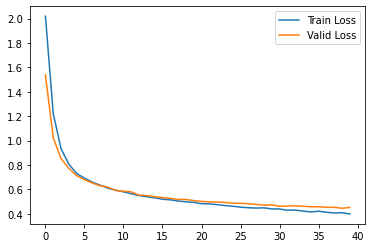

In [24]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')

plt.legend()

# **Load the Model with the Lowest Validation Loss**

In [ ]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

# **Test The Train Network**

In [25]:
#track the test loss
test_loss = 0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


model.eval()
for images, labels in testloader:
  #forword pass 
  output = model(images)
  #calculate the loss
  loss = criterion(output, labels)
  #update the test loss
  test_loss += loss.item()*images.size(0)
  # convert output probabilities to predicted class
  _, pred = torch.max(output, 1)
  #compare predictions to the true labes
  correct = np.squeeze(pred.eq(labels.data.view_as(pred)))
  #calculate test accuracy for each object class
  for i in range(len(labels)):
    label = labels.data[i]
    class_correct[label] += correct[i].item()
    class_total[label] +=1

#calcaulate and prınt test loss
test_loss = test_loss/len(testloader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
  if class_total[i] > 0:
    print('Test Accuracy of %5s: %2d%% (%2d/%2d)'%
          (str(i), 100 * class_correct[i]/class_total[i],
           np.sum(class_correct[i]), np.sum(class_total[i])))
  else:
    print('Test Accuracy of %5s: N/A(no training examples)' % classes[i])

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))



Test Loss: 0.439647

Test Accuracy of     0: 79% (791/1000)
Test Accuracy of     1: 94% (948/1000)
Test Accuracy of     2: 80% (800/1000)
Test Accuracy of     3: 90% (900/1000)
Test Accuracy of     4: 69% (696/1000)
Test Accuracy of     5: 89% (892/1000)
Test Accuracy of     6: 57% (574/1000)
Test Accuracy of     7: 91% (918/1000)
Test Accuracy of     8: 94% (943/1000)
Test Accuracy of     9: 93% (938/1000)

Test Accuracy (Overall): 84% (8400/10000)


* 0: T-shirt/Top
* 1: Trouser
* 2: PullOver
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle Bot

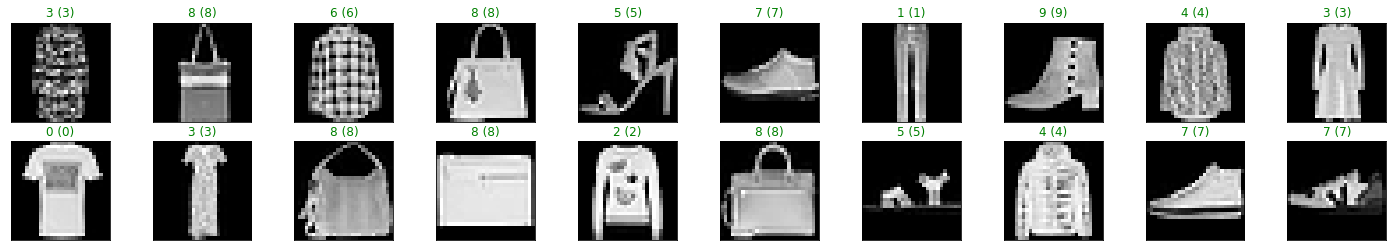

In [26]:
# obtain one batch of test images
dataiter = iter(testloader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))